In [1]:
 %autosave 1

Autosaving every 1 seconds


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("iris_dataset.csv")
#data.head()

In [21]:
data['variety'].replace(to_replace=data['variety'].unique(), 
                             value= list(range(len(data['variety'].unique()))), inplace=True)
x=np.array(data.drop('variety', axis=1))
y=np.array(data['variety'])
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=144)
#x_train.shape

In [54]:
class NaiveBayesClassifier():
    def __init__(self):
        pass
    def fit(self,x,y):
        sample, feature=x.shape
        self.unique_classes=np.unique(y)
        self.number_classes=len(self.unique_classes)
        prior=[]
        mean=[]
        var=[]
        for i in self.unique_classes:
            #print(i)
            mean.append(np.mean(x[np.where(y==i)],axis=0, dtype=np.float64))
            var.append(np.var(x[np.where(y==i)],axis=0, dtype=np.float64))
            prior.append(np.sum(y==i)/np.float64(sample))
            #self.prior_classes=np.sum(y==i,axis=0)/np.float64(sample)
        self.prior_classes=np.array(prior)
        self.mean_classes=np.array(mean)
        self.var_classes=np.array(var)
        #print(self.mean_classes)
    def gaussian_distribution(self, sample, mean, var):
        #print(sample, mean)
        const=1/np.sqrt(var*2*np.pi)
        probability=np.exp(-0.5*(pow(sample-mean,2)/var))
        return const*probability
    def calculate_postirior(self,x):
        postirior=[]
        for i, classes in enumerate(self.unique_classes):
            prior=np.log(self.prior_classes)
            likelihood=np.sum(np.log(self.gaussian_distribution(x,self.mean_classes[i],self.var_classes[i])))
            #print(prior,likelihood)
            postirior.append(prior+likelihood)
        #print(np.array(postirior))
        return np.array(postirior)
    def predict_classes(self,x):
        y_predict=[]
        for elements in x:
            y_predict.append(self.predict_class(elements))
        return y_predict
    def predict_class(self, element):
        class_predicted=self.calculate_postirior(element)
        #print(class_predicted)
        return self.unique_classes[np.argmax(class_predicted[:,0],axis=0)]
    def accuracy(self,y_test,y_predict):
        return np.sum(y_test==y_predict)/len(y_test)

In [55]:
nbc=NaiveBayesClassifier()
nbc.fit(x_train,y_train)
y_predict=nbc.predict_classes(x_test)
y_unique_classes=np.unique(y_test)
x_setosa=x_test[np.where(y_test==y_unique_classes[0])]
x_versicolor=x_test[np.where(y_test==y_unique_classes[1])]
x_virginica=x_test[np.where(y_test==y_unique_classes[2])]
y_test_setosa=y_test[np.where(y_test==0)]
y_test_versicolor=y_test[np.where(y_test==1)]
y_test_virginica=y_test[np.where(y_test==2)]
y_predict_setosa=nbc.predict_classes(x_setosa)
y_predict_versicolor=nbc.predict_classes(x_versicolor)
y_predict_virginica=nbc.predict_classes(x_virginica)
print("Overall Accuracy for Scratch model is: %.2f"%(nbc.accuracy(y_test,y_predict)*100),"%")
print("Setosa Accuracy for Scratch model is: %.2f"%(nbc.accuracy(y_test_setosa,y_predict_setosa)*100),'%')
print("Versicolor Accuracy for Scratch model is: %.2f"%(nbc.accuracy(y_test_versicolor,y_predict_versicolor)*100),'%')
print("Virginica Accuracy for Scratch model is: %.2f"%(nbc.accuracy(y_test_virginica,y_predict_virginica)*100),'%')
smcm=confusion_matrix(y_test,y_predict)
print("Confusion matrix for Scratch model is: \n",smcm)

Overall Accuracy for Scratch model is: 96.67 %
Setosa Accuracy for Scratch model is: 100.00 %
Versicolor Accuracy for Scratch model is: 91.67 %
Virginica Accuracy for Scratch model is: 100.00 %
Confusion matrix for Scratch model is: 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


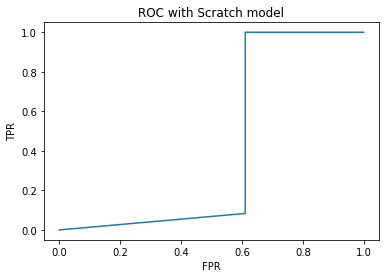

In [56]:
fpr,tpr,thresold=roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC with Scratch model")
plt.show()

In [57]:
area=auc(fpr,tpr)
print("Area under the curve with scratch model is :", area)

Area under the curve with scratch model is : 0.4143518518518518


In [62]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict_sklearn=gnb.predict(x_test)
accuracy_sklearn=accuracy_score(y_test,y_predict_sklearn)
print("Overall accuracy for SKlearn model is :%.2f"%(accuracy_sklearn*100),"%")
y_predict_setosa_sklearn=gnb.predict(x_setosa)
accuracy_setosa_sklearn=accuracy_score(y_test_setosa,y_predict_setosa_sklearn)
print("Accuracy for Setosa for SKlearn model is :%.2f"%(accuracy_setosa_sklearn*100),"%")
y_predict_versicolor_sklearn=gnb.predict(x_versicolor)
accuracy_versicolor_sklearn=accuracy_score(y_test_versicolor,y_predict_versicolor_sklearn)
print("Accuracy for Versicolor for SKlearn model is :%.2f"%(accuracy_versicolor_sklearn*100),"%")
y_predict_virginica_sklearn=gnb.predict(x_virginica)
accuracy_virginica_sklearn=accuracy_score(y_test_virginica,y_predict_virginica_sklearn)
print("Accuracy for Virginica for SKlearn model is :%.2f"%(accuracy_virginica_sklearn*100),"%")
smcm_sklearn=confusion_matrix(y_test,y_predict_sklearn)
print("Confusion matrix for Sklearn model is: \n",smcm_sklearn)

Overall accuracy for SKlearn model is :96.67 %
Accuracy for Setosa for SKlearn model is :100.00 %
Accuracy for Versicolor for SKlearn model is :91.67 %
Accuracy for Virginica for SKlearn model is :100.00 %
Confusion matrix for Sklearn model is: 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


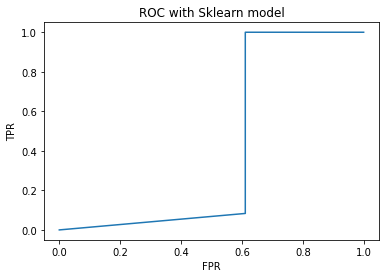

In [59]:
fpr_sklearn,tpr_sklearn,thresold_sklearn=roc_curve(y_test, y_predict_sklearn, pos_label=1)
plt.plot(fpr_sklearn,tpr_sklearn)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC with Sklearn model")
plt.show()

In [60]:
area_sklearn=auc(fpr_sklearn,tpr_sklearn)
print("Area under the curve with SKlearn model is :", area_sklearn)

Area under the curve with SKlearn model is : 0.4143518518518518


In [63]:
loss_function=np.array([[2,1,6],[4,2,4],[6,3,1]])
loss_matrix=np.multiply(smcm,loss_function)
risk=np.sum(loss_matrix)
print("Bayes risk :",risk)

Bayes risk : 51
